## Sine curve test

### Import da_rnn_from_csv to test the model using a sine curve

1. Create ocillating values using np.sin;
2. Save a DataFrame with 2 columns;  
 * x_vals = degrees from 0 to 36000, 4 degrees spacing
 * y_vals = np.sin(x_vals * np.pi / 180)
3. Name the column with the y_values "close";
4. Save the DataFrame to data/sin_vals.csv;
5. Run da_rnn_from_csv.main using 5000 rows;
6. Plot the y_act values vs y_pred values to show that they align.

### Imports

In [1]:
import pandas as pd
import sys,os
import numpy as np
import pandas as pd
import da_rnn_from_csv as drfc

### Create csv

In [2]:
x_vals = np.linspace(0,360*100,360*100/4 + 1)
y_vals = np.sin(x_vals*np.pi/180)
df = pd.DataFrame({'x_vals':x_vals,'close':y_vals})
df.to_csv('data/sin_vals.csv',index=False)

/Users/bperlman1/Virtualenvs3/pyliverisk/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


### Run the da_rnn model

2019-01-04 23:06:37,467 - VOC_TOPICS - INFO - Shape of data: (5000, 3).
Missing in data: 0.
2019-01-04 23:06:37,473 - VOC_TOPICS - INFO - Training size: 3500.
2019-01-04 23:06:37,474 - VOC_TOPICS - INFO - Is CUDA available? False.
2019-01-04 23:06:37,475 - VOC_TOPICS - INFO - Iterations per epoch: 28.
/Users/bperlman1/Documents/billybyte/pyliverisk/jupyter_notebooks/da_rnn/da_rnn_from_csv.py:181: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attn_weights = F.softmax(softmax_input) # torch tensor dimensions = [batch_size * input_size] andattn weights with values sum up to 1.
/Users/bperlman1/Documents/billybyte/pyliverisk/jupyter_notebooks/da_rnn/da_rnn_from_csv.py:237: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  )).view(-1, self.T - 1)) # batch_size * T - 1, row sum up to 1
/Users/bperlman1/Documents/billybyte/pyliverisk/jupyter_not

['close' 'x_vals'] (9001, 2)
moving the close column to the label_column


2019-01-04 23:06:39,220 - VOC_TOPICS - INFO - Epoch 0, loss: 0.409.


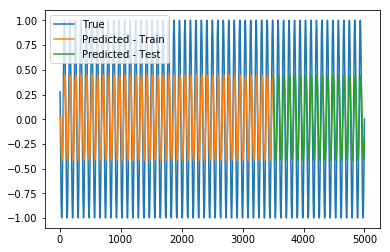

2019-01-04 23:06:57,466 - VOC_TOPICS - INFO - Epoch 10, loss: 0.000.


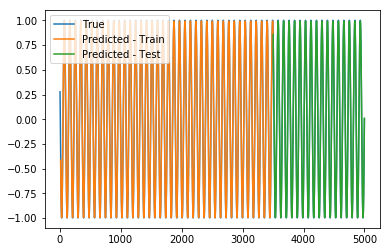

2019-01-04 23:07:15,357 - VOC_TOPICS - INFO - Epoch 20, loss: 0.000.


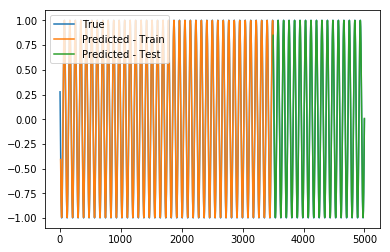

2019-01-04 23:07:33,161 - VOC_TOPICS - INFO - Epoch 30, loss: 0.000.


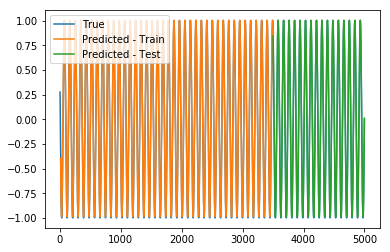

2019-01-04 23:07:50,962 - VOC_TOPICS - INFO - Epoch 40, loss: 0.000.


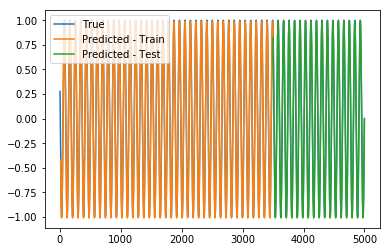

2019-01-04 23:08:09,902 - VOC_TOPICS - INFO - Epoch 50, loss: 0.000.


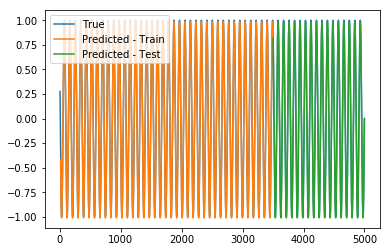

2019-01-04 23:08:27,766 - VOC_TOPICS - INFO - Epoch 60, loss: 0.000.


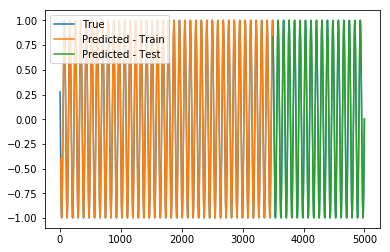

2019-01-04 23:08:47,070 - VOC_TOPICS - INFO - Epoch 70, loss: 0.000.


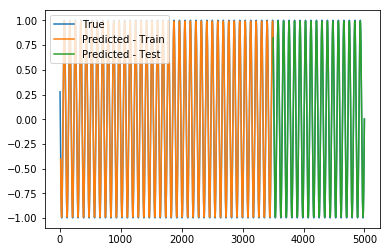

2019-01-04 23:09:05,031 - VOC_TOPICS - INFO - Epoch 80, loss: 0.000.


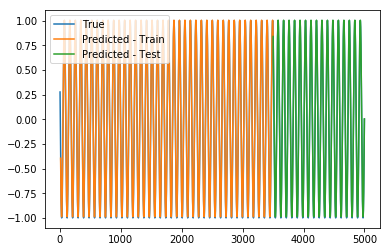

2019-01-04 23:09:23,529 - VOC_TOPICS - INFO - Epoch 90, loss: 0.000.


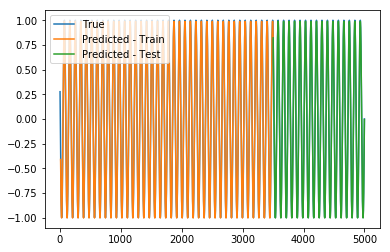

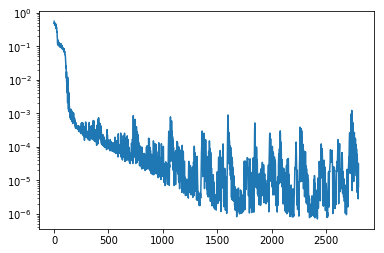

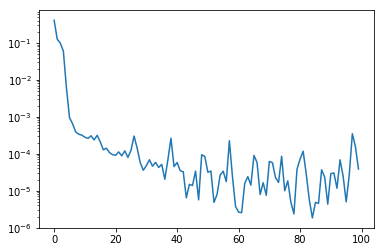

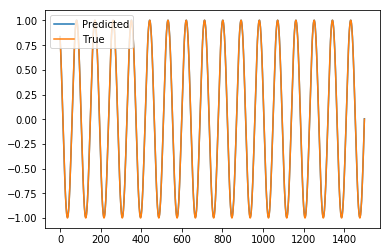

mean predicted price from pred_df: -0.012478, mean predicted price from model.predict: -0.008328


In [3]:
fname_no_ext = 'sin_vals'
rows_to_use = 5000
return_dict = drfc.main(FILE_NAME_NO_EXTENSION=fname_no_ext,subset_rows=rows_to_use)
df_partial = return_dict['dataframe']
m = return_dict['model']


### Plot a zoomed in portion of the DataFrame that compares y_act with y_pred

1500 1500 1500


/Users/bperlman1/Virtualenvs3/pyliverisk/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


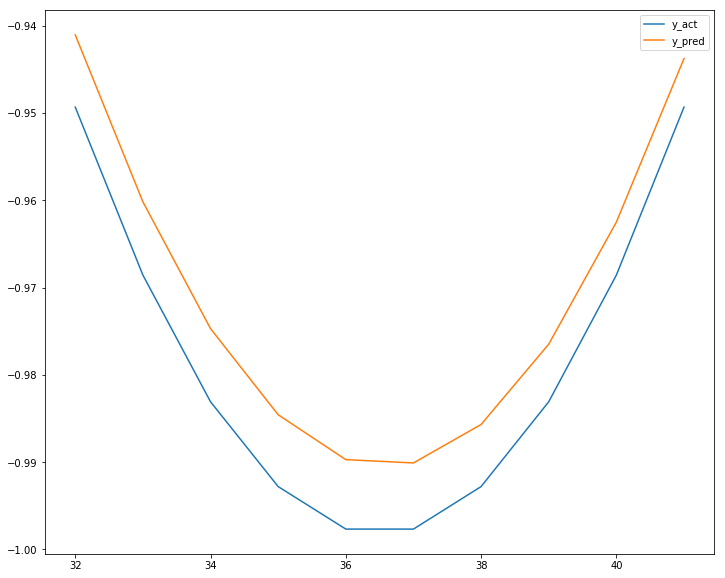

In [4]:
test_size = return_dict['test_size']
y_act = m.y[-1*test_size:]
y_pred = return_dict['y_pred'][-1 * test_size:]
print(test_size,len(y_act),len(y_pred))
df_review = pd.DataFrame({'y_act':y_act,'y_pred':y_pred})

num_to_view = 10

beg_index = 32
end_index = beg_index+num_to_view
df_review.iloc[beg_index:end_index].plot(y=['y_act','y_pred'],figsize=(12,10))

In [5]:
df_review.iloc[beg_index:end_index]

,y_act,y_pred
32,-0.949333,-0.941058
33,-0.968572,-0.960182
34,-0.983084,-0.974708
35,-0.992798,-0.984568
36,-0.997667,-0.989709
37,-0.997667,-0.990090
38,-0.992798,-0.985685
39,-0.983084,-0.976486
40,-0.968572,-0.962504
41,-0.949333,-0.943771
